# **1. GIỚI THIỆU ĐỀ TÀI**


### **1.1 MÔ TẢ TỔNG QUAN**

# BÁO CÁO ĐỒ ÁN MÔN "LẬP TRÌNH SONG SONG ỨNG DỤNG"
### GVHD: TRẦN TRUNG KIÊN
### THỰC HIỆN: Nhóm 04
### DANH SÁCH THÀNH VIÊN
  1. 18120167 - Nguyễn Viết Dũng
  2. 18120579 - Đặng Minh Thọ
  3. 18120584 - Phạm Đình Thục


 - Link thùng chứa Github của nhóm: https://github.com/pdthuc/Applied-Parallel-Programming
 - Link Notebook: https://colab.research.google.com/drive/1B78maMjn4Kj92OiXho6Zem89KnpvBc9k
 - kế hoạch phân công và làm việc nhóm: https://docs.google.com/spreadsheets/d/1ujRUfYyoGNbrof7VHU2Sj7fGFMxFfGlP1nINrSmHjgc/edit?usp=sharing


 <font size="5"> 
**Tên đề tài:** 
Image-Search-using-Parallel-Computing
*(Công cụ Tìm kiếm Hình ảnh bằng kỹ thuật truy vấn truy xuất hình ảnh dựa trên nội dung liên quan )*</font> 




Với sự phát triển mạnh mẽ của internet, mọi người có thể tiếp cận với một lượng lớn thông tin. Do đó, việc truy xuất thông tin quan tâm trở nên rất khó khăn.
Chẳng hạn như ảnh, video ở nhiều định dạng khác nhau như JPG, PNG, BMP và thậm chí cả GIF. 

-> Do đó cần có một công cụ tìm kiếm hình ảnh để tìm kiếm các hình ảnh liên quan và chính xác.
Truy xuất hình ảnh dựa trên nội dung tìm kiếm các phương pháp để index, browse và truy vấn cơ sở dữ liệu hình ảnh lớn bằng cách sử dụng các phương pháp feature extraction và so sánh các feature.

<font size="4"> 
- **Input:** Hình ảnh cần truy vấn trong dataset.
- **Output:** Những hình ảnh liên quan với ảnh input trong dataset.
</font> 



<table>
  <tr>
  <td>
    <img src="https://drive.google.com/uc?id=1ykGFVzg4c4SnFjCUAL3OTJjz45NTHwvn
" width="400"  style="width: 250px;"
    /> 
    
      Input
  
  </td>
  
  <td>
    <img src="https://drive.google.com/uc?id=1jS8PtyG7BzEQ3y65Rc0y5Wnaiex0Kwat" width="550" style="width: 250px;"
    /> 

      Output

  </td>

  </tr>
</table>

*Nguồn ảnh: https://github.com/Defcon27/Image-Search-using-Parallel-Computing*

### **1.2 Ý NGHĨA THỰC TẾ CỦA ỨNG DỤNG**


Thực tế đã có nhiều máy tìm kiếm cho phép tìm kiếm hình ảnh theo nội dung ảnh:
- **Google Image Swirl**: Là một thử nghiệm tìm kiếm hình ảnh theo nội dung của Google


- **Tiltomo**: Là một công cụ dựa trên Flickr và duy trì chính cơ sở dữ liệu ảnh của Flickr. Nó cho phép tìm kiếm ảnh dựa vào độ tương đồng về chủ đề, màu sắc hay kết cấu

### **1.3 VẤN ĐỀ SONG SONG HÓA**



Ứng dụng nảy có cần song song hóa hay không?

-> <font size="5"> **Có** </font> 

Vì:
- Bài toán sẽ làm việc với một số lượng lớn hình ảnh
- Thuật toán xử lý và lưu trữ dữ liệu hình ảnh
- Sử dụng các phương pháp feature extraction và xử lý quá trình extraction
- Ứng dụng sử dụng CNN để áp các filter nên có tiền năng song song hóa

Với sự trợ giúp của song song, quá trình nặng nhọc này có thể được chia thành nhiều tác vụ nhỏ hơn và thực hiện chúng cùng một lúc. Điều này giúp chương trình chạy nhanh hơn, mượt mà hơn và sử dụng tài nguyên hiệu quả hơn rất nhiều. Do đó, việc thực hiện song song trong tìm kiếm hình ảnh có thể giảm đáng kể thời gian truy xuất và cải thiện hiệu suất của hệ thống truy xuất vốn rất quan trọng trong 

## **1.4 DATASET**







<img align="right"
  height="400"
  src="https://drive.google.com/uc?id=16OtBWlwhytB8St6mlsjO_pteRBwHKvir"
/>
<p >
Sử dụng yolo5_on_animal_dataset với:

- Kích thước: khoảng 1.14 GB
- Số lượng: 19 loài vật với 3631 ảnh
- Nội dung: Dữ liệu liên quan đến ảnh của các loài động vật (Hổ, sư tử, báo, chó sói, cáo, ...)
</p>

*Nguồn ảnh: https://www.kaggle.com/code/yourwanghao/learn-yolov5-on-animal-datasets/data*

# **2. CÀI ĐẶT TUẦN TỰ**

## **2.1 Ý TƯỞNG CHUNG**



 
<img align="right" src="https://drive.google.com/uc?id=1AON1eSitOY0EM896i6VFruPs7ka3Xi-A" width=45%/>
<p>  

<td>

Kiến trúc được đề xuất chủ yếu bao gồm ba mô-đun:

1. Preprocessing
2. Indexing image
3. Query searching


* Thứ nhất, toàn bộ image database paths được parsed và lưu trữ trong list data structure.

* Tiếp theo, Indexing các features vectors mà nó đã trích xuất từ ​​hình ảnh và  được lưu trữ trong là tên của hình ảnh và giá trị là features vectors ứng của ảnh đó. 

* Cuối cùng, Số liệu được sử dụng để so sánh vectơ hình ảnh truy vấn với vectơ hình ảnh trong database sẽ là chi-square distance measurement và kết quả distance metric thu được sẽ được sắp xếp và 20 kết quả hàng đầu sẽ được trả về.
</td>

*Nguồn ảnh: https://github.com/Defcon27/Image-Search-using-Parallel-Computing*

## **2.2 PRE-PROCESSING**



<img align="right" src='https://drive.google.com/uc?id=1_fekLC1XHUj8vtCbJdY-xeLSBHqPKBtd' width=25%/>

<p>  

**PRE-PROCESSING TECHNIQUES**

*     Resizing
*     Gray Scaling
*     Convolution Filters
*     Noise Reduction
*     Image Sharpening


**INPUT:** là ảnh RGB với kích thước lớn (500x500 ~ 2000x2000):
*    Reszie về kích thước nhỏ hơn (500 x 500).
*    Áp dụng Filter Gausian Blur để mịn và giảm nhiễu cho ảnh.
*    Các loại Filter khác nhau được sử dụng để giảm Noise.

**OUTPUT:** là ảnh được Resize và đã được làm mịn, giảm nhiễu
</p>

*Nguồn ảnh: https://github.com/Defcon27/Image-Search-using-Parallel-Computing*

## **2.3 FEATURE EXTRACTION**

<img align="center" src='https://drive.google.com/uc?id=1DS7m-XLLqbetXqmFu2eQhsvTWIjhmKSb' width=75%/>

*Nguồn ảnh: https://github.com/Defcon27/Image-Search-using-Parallel-Computing*

### **2.3.0 QUANTIZE HISTOGRAM 12 BINS**

<img align="justify" src='https://drive.google.com/uc?id=1L79IsPf6LcCB1zXuymTp_BbnrRJJLfft' width=60%/>

*Nguồn ảnh: https://www.researchgate.net/figure/Examples-of-hue-channel-quantizing-a-quantized-to-3-bins-b-quantized-to-6-bins-and_fig4_308037385*

### **2.3.1 CACULATE MEAN AND STD**

Ở bước này, sẽ tính toán mean và standard deviation (STD, độ lệch chuẩn) cho mỗi channel.

- `mean` đại diện cho độ sáng của hình ảnh
- `STD` thể hiện độ tương phản




**INPUT**: Ảnh đầu vào sau khi được xử lý ở bước quantize 12 bins

**OUTPUT**: 6 feature vectors (2 cho mỗi channel R,G,B)

### **2.3.2 CACULATE 3D COLOR HISTOGRAM**

<img align="right" src='https://drive.google.com/uc?id=1HC2z_MjCawywgKSFnCSHsmLPsXeLTLpx' width=35%/>

* Màu sắc là đặc điểm nổi bật và quan trọng nhất của hình ảnh vì nó là phần chi phối cảm nhận thị giác của con người.

* `Color Histogram` được chia thành các color bins và mỗi pixel có một màu cụ thể thuộc color bins của màu đó. 

* Sử dụng `3D Color Histogram` có bin_size là 12 cho mỗi channel có hình dạng 12x12x12 tương ứng với 1728 feature vectors khi flatten.

*Nguồn ảnh: https://ww2.mathworks.cn/matlabcentral/fileexchange/38685-3d-histogram-of-rgb-image?s_tid=prof_contriblnk*

**INPUT**: Ảnh đầu vào sau khi được xử lý ở bước quantize 12 bins

**OUTPUT**: 1728 feature vectors (12 x 12 x 12)



### **2.3.3 COMPUTE HU MOMENTS**

<img align="right" src='https://drive.google.com/uc?id=169vzvg-AEqwwWGAyALVjHLothYc8OvYZ' width=50%/>

- `Convolution filter` và `Laplacian filter` được áp dụng để phát hiện cạnh, thu được hình ảnh được lọc với các cạnh của các đối tượng trong hình ảnh
- `Hu Moments` thường được trích xuất từ hình bóng hoặc đường viền của một đối tượng trong ảnh. Bằng cách mô tả hình bóng hoặc đường viền của một đối tượng, chúng tôi có thể trích xuất một vectơ đặc điểm hình dạng để đại diện cho hình dạng của đối tượng.
- `Hu Moments` là một tập hợp 7 số được tính toán bằng cách sử dụng các central moments bất biến đối với các phép biến đổi hình ảnh (translation, scale, and rotation, and reflection).

*Nguồn ảnh: https://learnopencv.com/shape-matching-using-hu-moments-c-python/*

**INPUT**: Ảnh đầu vào sau khi được xử lý ở bước quantize 12 bins

**OUTPUT**: 7 feature vectors 



**Convolution of Images**


<td>
  <img src="https://drive.google.com/uc?id=1pTk0wn7MxsYXflVFa4FxFYXiJ63jXhJJ" width="900"  style="width: 250px;"
  /> 
</td>

<td>
  <img src="https://drive.google.com/uc?id=14xDBAkkDo36_CbUl59_-t-ldoEOfdw4U" width="930"  style="width: 250px;"
  />   
</td>



<td>
  <img src="https://drive.google.com/uc?id=1PG0nRD7_z_fx1y-Hb4K4olruki4Uapx4" width="900"  style="width: 250px;"
  /> 
</td>

<td>
  <img src="https://drive.google.com/uc?id=1DGacUDz2lUnSAYr5ec3Ckw69d-KVBdgQ" width="930"  style="width: 250px;"
  />   
</td>

*Nguồn ảnh: https://github.com/Defcon27/Image-Search-using-Parallel-Computing*

## **2.4 SIMILARLITY MEASUREMENT**

<img align="right" src='https://drive.google.com/uc?id=16QXqzdDNR4AipJPfVw-82xDi7aIjujXU' width=40%/>

* Các feature vectors này của tất cả các hình ảnh được lưu trữ trong một hash table. 

* Sau khi cơ sở dữ liệu của hình ảnh có feature vectors được tạo, người dùng có thể đưa ra hình ảnh dưới dạng truy vấn để lấy các hình ảnh có liên quan từ cơ sở dữ liệu

* Chi-Square distance metric được sử dụng để tính toán sự khác biệt giữa vectơ đặc điểm hình ảnh truy vấn và vectơ đặc điểm cơ sở dữ liệu về sự giống nhau

*Nguồn ảnh: https://github.com/Defcon27/Image-Search-using-Parallel-Computing*

## **2.5 KẾT QUẢ**

In [ ]:
import os
import cv2
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/LTSS/Image-Search-using-Parallel-Computing-master/
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/LTSS/Image-Search-using-Parallel-Computing-master
Docs					  ImageSearch.ipynb
FeatureVectors.py			  ImageSearch_Parallel.py
Group04-AppliedParallelProgramming.ipynb  ImageSearch_Serial.py
Image_Database				  __pycache__
Image_Filters				  QuerySearch.py
Image_Histograms			  README.md


In [ ]:
from ImageSearch_Serial import ImageSearch

start = time.perf_counter()
search_results = ImageSearch("1.jpg")
end = time.perf_counter()
print(f"Sequential Time : {end-start}")
seq_time = end-start

Sequential Time : 283.410653234


In [ ]:
for sr in search_results[:20]:
    print(sr)

('1.jpg', 0.0)
('109.jpg', 45411.74413)
('2078.jpg', 51322.98354)
('587.jpg', 52690.59061)
('1986.jpg', 52694.59601)
('1911.jpg', 53149.61172)
('1100.jpg', 53258.34266)
('718.jpg', 54274.44697)
('3553.jpg', 57233.82148)
('3290.jpg', 57954.01645)
('1424.jpg', 58291.07103)
('1074.jpg', 60832.15537)
('4365.jpg', 61183.9087)
('3308.jpg', 61658.52589)
('1536.jpg', 62540.99001)
('2442.jpg', 62651.87391)
('4234.jpg', 63944.27114)
('1250.jpg', 63952.21351)
('2798.jpg', 64683.49634)
('600.jpg', 65018.18188)


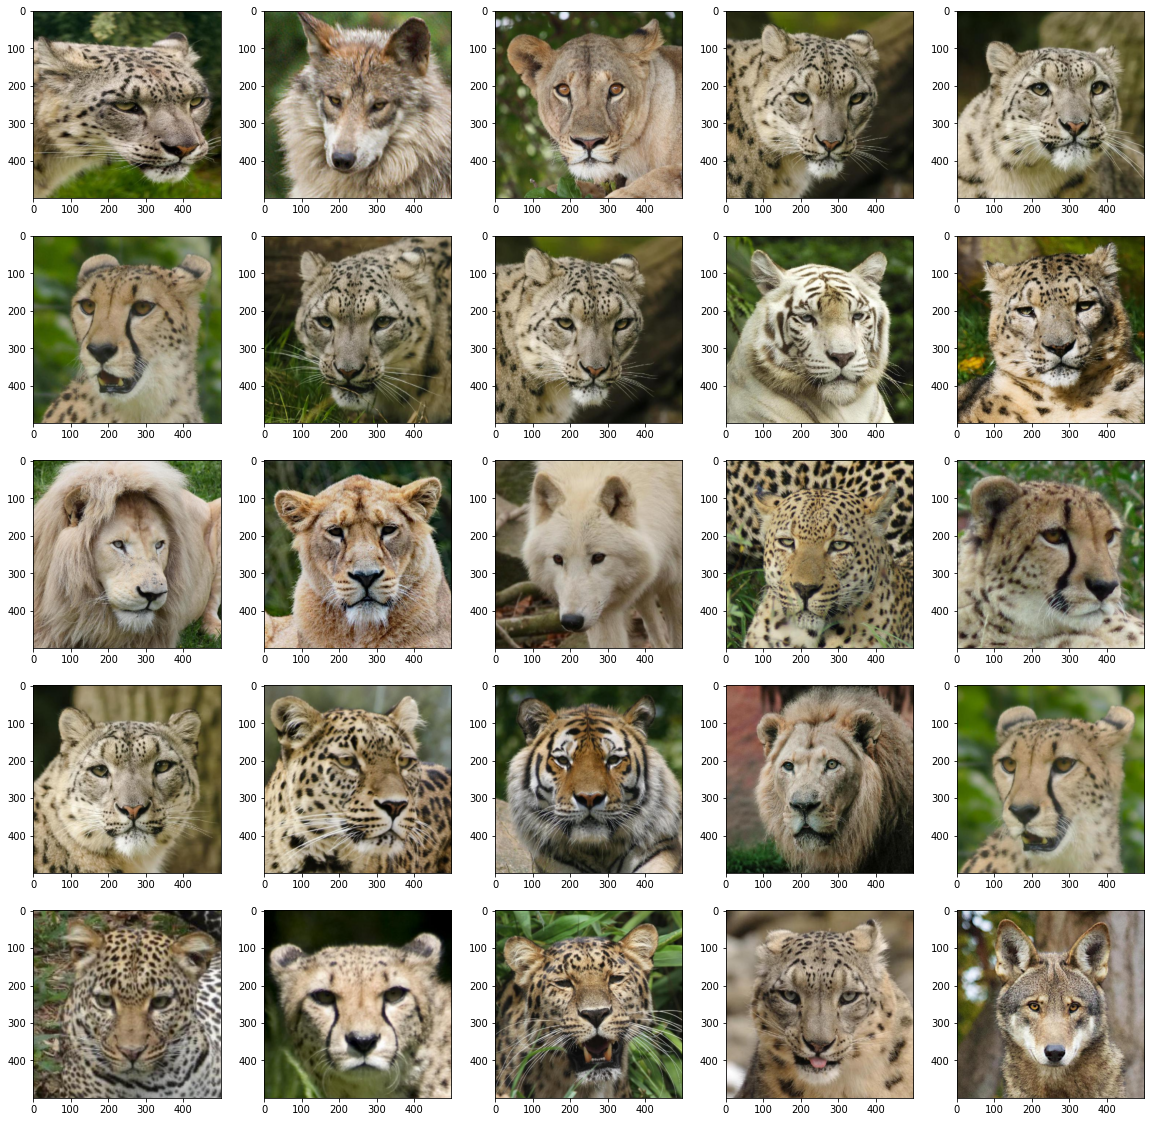

In [ ]:
def getImg(img):
    image_db_path = "Image_Database/"
    image = cv2.imread(image_db_path+img)
    image = cv2.resize(image, (500,500))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

plt.figure(figsize=(20,20)) 

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(getImg(search_results[i][0]))

plt.show()

# TÀI LIỆU THAM KHẢO

1.   *https://github.com/Defcon27/Image-Search-using-Parallel-Computing*
2.   *https://www.kaggle.com/datasets/theaayushbajaj/cbir-dataset*
3.   *https://learnopencv.com/shape-matching-using-hu-moments-c-python/*





Và nhóm xin gửi lời cảm ơn đặc biệt đến https://stackoverflow.com/ vì đã hỗ trợ nhóm trong quá trình làm đồ án này. ♥♥♥


